In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')
all_commoditites = pd.read_csv('../data/commodity_totals.csv')

In [3]:
demo_fruitnut['Organization Type'] = demo_fruitnut['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_berries['Organization Type'] = demo_berries['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_citrus['Organization Type'] = demo_citrus['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_vegetables['Organization Type'] = demo_vegetables['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
all_commoditites['Farm Size'] = all_commoditites['Domain Category'].map(lambda x: '1.0 TO 9.9 ACRES' if '1.0 TO 9.9 ACRES' in x
                                                                              else '10.0 TO 49.9 ACRES' if '10.0 TO 49.9 ACRES' in x
                                                                              else '50.0 TO 69.9 ACRES' if '50.0 TO 69.9 ACRES' in x
                                                                              else '70.0 TO 99.9 ACRES' if '70.0 TO 99.9 ACRES' in x
                                                                              else '100 TO 139 ACRES' if '100 TO 139 ACRES' in x
                                                                              else '140 TO 179 ACRES' if '140 TO 179 ACRES' in x
                                                                              else '180 TO 219 ACRES' if '180 TO 219 ACRES' in x
                                                                              else '220 TO 259 ACRES' if '220 TO 259 ACRES' in x
                                                                              else '260 TO 499 ACRES' if '260 TO 499 ACRES' in x
                                                                              else '500 TO 999 ACRES' if '500 TO 999 ACRES' in x
                                                                              else '1,000 TO 1,999 ACRES' if '1,000 TO 1,999 ACRES' in x
                                                                              else '2,000 OR MORE ACRES' if '2,000 OR MORE ACRES' in x
                                                                              else "")

C:\Users\corne\AppData\Local\Temp\ipykernel_66984\3416296823.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


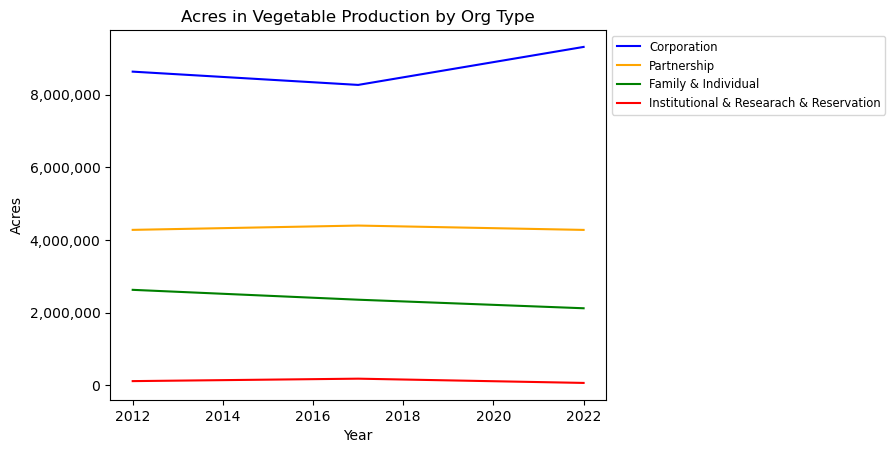

In [4]:
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (D)']
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (Z)']
demo_vegetables['Value'] = demo_vegetables['Value'].str.replace(',', '')
demo_vegetables['Value'] = pd.to_numeric(demo_vegetables.Value, downcast='integer').fillna(0)
demo_vegetables_area = demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION')
                & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_vegetables_area = demo_vegetables_area.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_vegetables_area = demo_vegetables_area[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]
demo_vegetables_area_graph = demo_vegetables_area.plot(x = 'Year', y = list(
    demo_vegetables_area.columns.unique()[1:5]), 
                                            kind = "line", title = "Acres in Vegetable Production by Org Type",
                                                      ylabel = "Acres", color = ['blue', 'orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
demo_vegetables_area_graph.savefig('graphs/demo_vegetables_area_graph.png', transparent=True, bbox_inches='tight')

In [5]:
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (D)']
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (Z)']
demo_berries['Value'] = demo_berries['Value'].str.replace(',', '')
demo_berries['Value'] = pd.to_numeric(demo_berries.Value, downcast='integer').fillna(0)
demo_berries_area = demo_berries.loc[(demo_berries['Domain'] == 'ORGANIZATION')
                & (demo_berries['Data Item'] == 'BERRY TOTALS - ACRES GROWN')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_berries_area = demo_berries_area.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_berries_area = demo_berries_area[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]
demo_berries_area

Organization Type,Year,Corporation,Partnership,Family & Individual,Institutional & Researach & Reservation
0,2012,704592,159701,205117,15280
1,2017,767404,200316,190847,12965
2,2022,818794,244413,239432,6548


C:\Users\corne\AppData\Local\Temp\ipykernel_66984\846371504.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


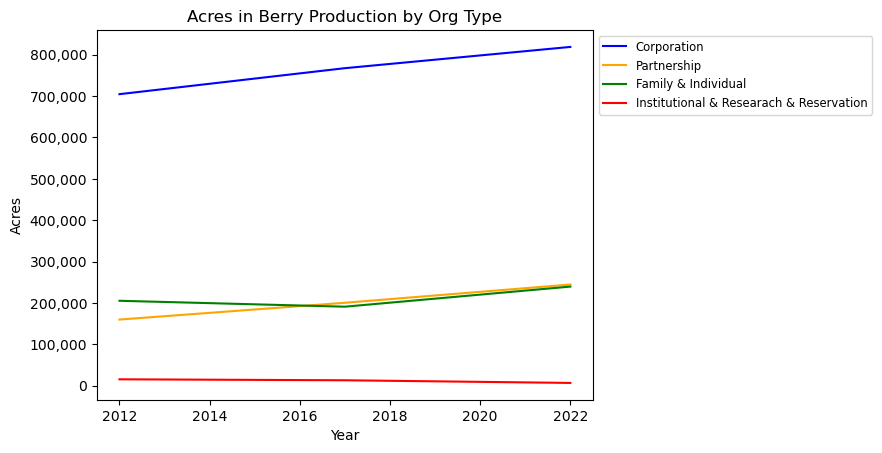

In [6]:
demo_berries_area_graph = demo_berries_area.plot(x = 'Year', y = list(
    demo_berries_area.columns.unique()[1:5]), kind = "line", title = "Acres in Berry Production by Org Type",
                                                ylabel = "Acres", color = ['blue', 'orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
demo_berries_area_graph.savefig('graphs/demo_berries_area_graph.png', transparent=True, bbox_inches='tight')

In [7]:
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (D)']
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (Z)']
demo_citrus['Value'] = demo_citrus['Value'].str.replace(',', '')
demo_citrus['Value'] = pd.to_numeric(demo_citrus.Value, downcast='integer').fillna(0)
demo_citrus_area = demo_citrus.loc[(demo_citrus['Domain'] == 'ORGANIZATION')
                & (demo_citrus['Data Item'] == 'CITRUS TOTALS - ACRES BEARING & NON-BEARING')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_citrus_area = demo_citrus_area.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_citrus_area = demo_citrus_area[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]

C:\Users\corne\AppData\Local\Temp\ipykernel_66984\3862707227.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


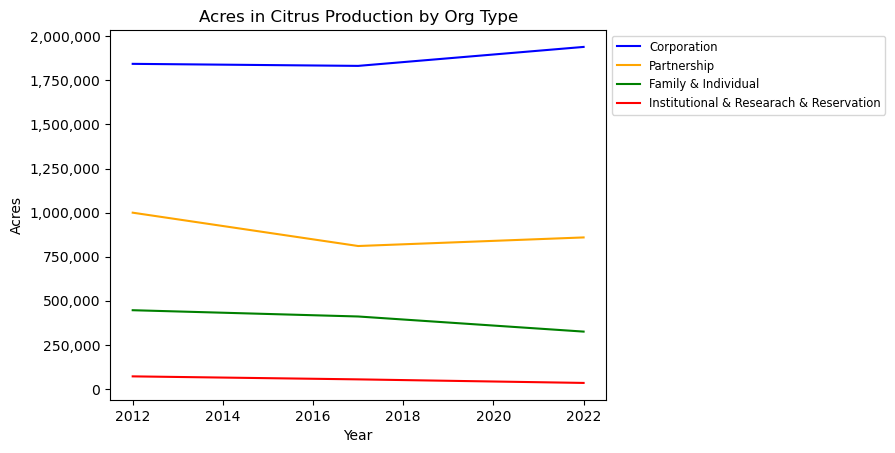

In [8]:
demo_citrus_area_graph = demo_citrus_area.plot(x = 'Year', y = list(
    demo_citrus_area.columns.unique()[1:5]), kind = "line", title = "Acres in Citrus Production by Org Type",
                                              ylabel = "Acres", color = ['blue', 'orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
demo_citrus_area_graph.savefig('graphs/demo_citrus_area_graph.png', transparent=True, bbox_inches='tight')

In [9]:
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (D)']
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (Z)']
demo_fruitnut['Value'] = demo_fruitnut['Value'].str.replace(',', '')
demo_fruitnut['Value'] = pd.to_numeric(demo_fruitnut.Value, downcast='integer').fillna(0)
demo_fruitnut_sales = demo_fruitnut.loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')
                & (demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $')].groupby(
                ['Year', 'Organization Type']).sum(
                'Value').fillna(0).reset_index()
demo_fruitnut_sales = demo_fruitnut_sales.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
demo_fruitnut_sales = demo_fruitnut_sales[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]

C:\Users\corne\AppData\Local\Temp\ipykernel_66984\2351197540.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


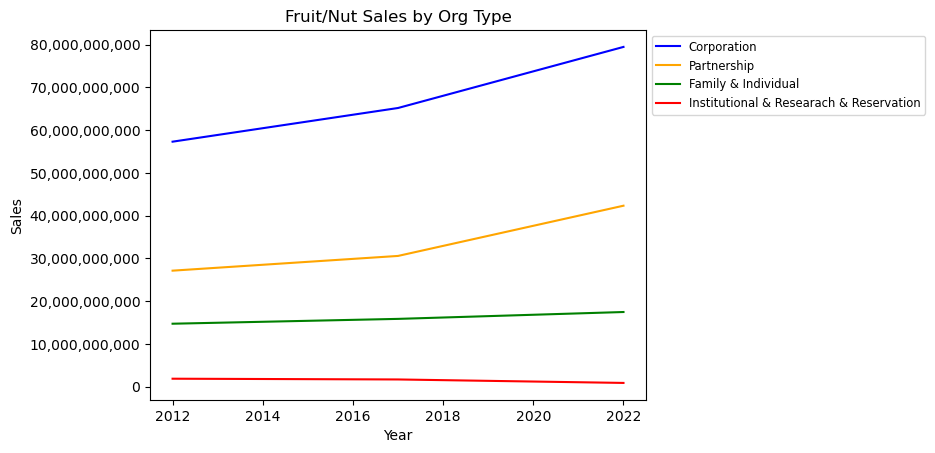

In [34]:
fruit_sales_demo_graph = demo_fruitnut_sales.plot(x = 'Year', y = list(
    demo_fruitnut_sales.columns.unique()[1:5]), kind = "line", title = "Fruit/Nut Sales by Org Type",
                                                 ylabel = "Sales", color = ['blue', 'orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
fruit_sales_demo_graph.savefig('graphs/fruit_sales_demo_graph.png', transparent=True, bbox_inches='tight')